# Week 6: Classifications Tasks on the Iris Dataset

## 1. Decision Trees

Part of this Notebook was originally developed by [Jude Fletcher](https://eng.ox.ac.uk/people/jude-fletcher/).

Decision Trees are a non-parametric supervised machine learning technique for classification and regression. Its aim is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features or input vectors.

<h3>Dataset: Iris </h3>

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936. 
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Source: https://en.wikipedia.org/wiki/Iris_flower_data_set

<img src="../images/iris-data-set-01.png" width="500" style="float: left;"> 

<img src="../images/iris-species.png" width="500" style="float: left;"> 


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Setup

In [78]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

<h3>Loading and preparing the dataset.</h3>

**NOTE**: decision trees don't need feature scaling.

In [79]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [80]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [81]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [82]:
df = pd.DataFrame.from_dict(iris, orient='index', columns=['data']) #, 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
df

/Users/nick/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,data
data,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [..."
target,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
frame,None
target_names,"[setosa, versicolor, virginica]"
DESCR,.. _iris_dataset:\n\nIris plants dataset\n----...
feature_names,"[sepal length (cm), sepal width (cm), petal le..."
filename,iris.csv
data_module,sklearn.datasets.data


In [83]:
df = pd.DataFrame(iris['data'], None, iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100,3.500,1.400,0.200
1,4.900,3.000,1.400,0.200
2,4.700,3.200,1.300,0.200
3,4.600,3.100,1.500,0.200
4,5.000,3.600,1.400,0.200
...,...,...,...,...
145,6.700,3.000,5.200,2.300
146,6.300,2.500,5.000,1.900
147,6.500,3.000,5.200,2.000
148,6.200,3.400,5.400,2.300


In [84]:
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0
...,...,...,...,...,...
145,6.700,3.000,5.200,2.300,2
146,6.300,2.500,5.000,1.900,2
147,6.500,3.000,5.200,2.000,2
148,6.200,3.400,5.400,2.300,2


In [85]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [86]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=77)

In [89]:
X_train[:3, :]

array([[7.1, 3. , 5.9, 2.1],
       [7.7, 2.8, 6.7, 2. ],
       [6.7, 3.1, 5.6, 2.4]])

In [90]:
y_train

array([2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2,
       1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2,
       0, 1, 1])

In [95]:
X_test[:3]

array([[5.8, 2.7, 3.9, 1.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.7, 2.5, 5. , 2. ]])

In [43]:
y_train[:3]

array([2, 2, 2])

In [91]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [92]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Data Visualization and Exploration

Let's have a very quick overview of the data plotting the scatter matrix

In [41]:
iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
iris_df['species'] = y_train
iris_df['species'] = pd.Categorical(iris_df.species.apply(lambda y: iris.target_names[y]))
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
34,5.400,3.900,1.300,0.400,setosa
132,4.900,3.600,1.400,0.100,setosa
120,5.500,2.400,3.700,1.000,versicolor
46,5.000,3.600,1.400,0.200,setosa
86,6.100,2.800,4.700,1.200,versicolor
114,6.400,3.200,4.500,1.500,versicolor
14,4.900,2.500,4.500,1.700,virginica
20,6.600,3.000,4.400,1.400,versicolor
11,6.300,2.900,5.600,1.800,virginica
16,7.200,3.000,5.800,1.600,virginica


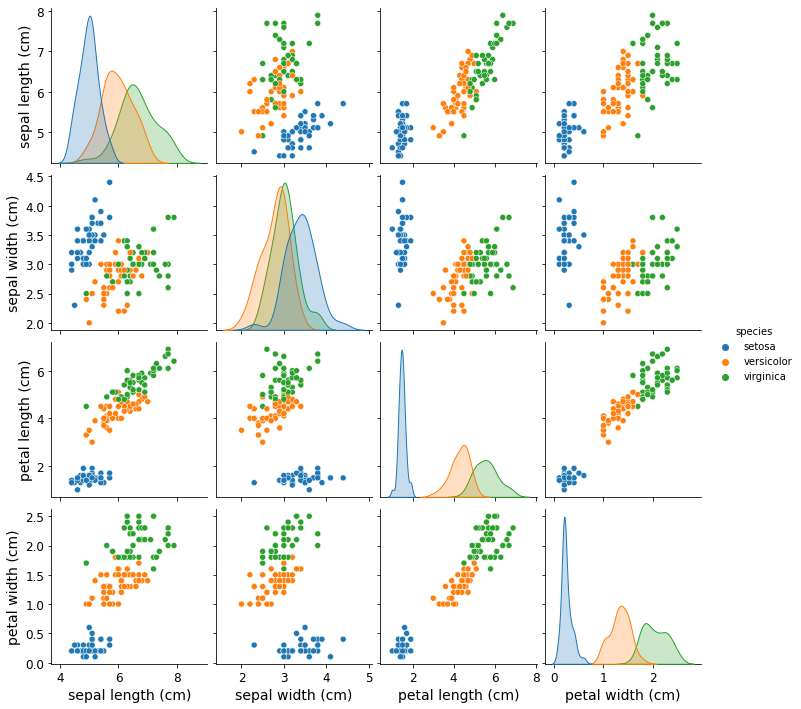

In [93]:
import seaborn as sns
pal = sns.color_palette(n_colors=3)
sns.pairplot(iris_df, hue='species')
plt.show()

**Exercise:** What can you infer from the graph?

## Petal width and petal length reasonably distinct (little bit of overlap between versicolor and virginica), but distinct categories should make it easier to predict.
## However, sepal length and sepal width has more overlap - may affect accuracy of prediction...

## Decision Tree: training and evaluation

Now let's actually initialize and train our Decision Tree.

<strong>DecisionTreeClassifier</strong> is a class capable of performing multi-class classification on a dataset - i.e. capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

As with other classifiers, <strong>DecisionTreeClassifier.fit()</strong> takes as input two arrays:
1. An array X, sparse or dense, of size <i>[n_samples, n_features]</i> holding the training samples<br>
2. And an array Y of integer values, size <i>[n_samples]</i>, holding the class labels for the training samples

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(max_depth=2)
tree_cl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Using the `plot_tree()` function we can plot the resulting decision tree.

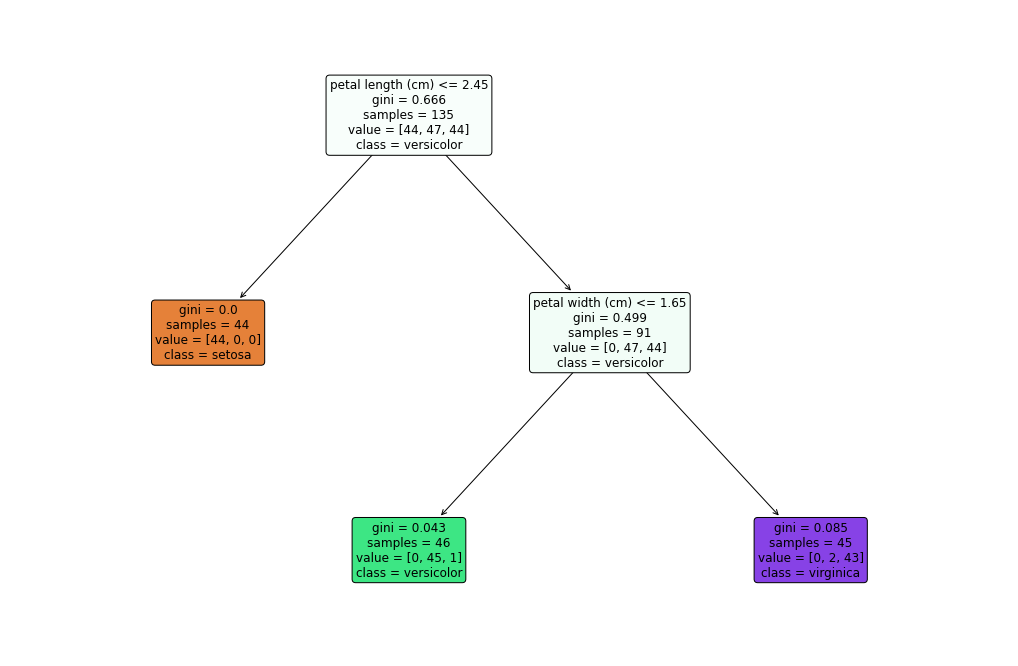

In [14]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)

### Training a Decision Tree

Given training array $\mathbf{X}$ a label vector $\mathbf{y}$, a decision tree <b> recursively </b> partitions the feature space such that the samples with the same labels or similar target values are grouped together. In order to do this, the training algorithm (called *CART*) aims at minimizing an inpurity metric, called "gini". The CART algorithm is a greedy algorithm, it finds the split that minimizes the gini value at the current level, it does not check if this choice will lead to the minimum gini value at the next iterations. In other words, it most often leads to a sub-optimal solution.

What is the "gini" metric? This is the impurity index of that branching point. It is zero if all the items in the current subset are assigned to a class, greater than zero otherwise. <b> The greater the gini value, the more spread are the values across multiple classes <b/>. 

$$ gini = \sum_{j} p_j (1 - p_j) $$ 

An <b>analogue</b> metric is entropy often used in decision trees is entropy (aka the "log loss"), <b>which is as well a measure of how spread are the values in multiple classes <b/>.

$$ H =  - \sum_{j} p_j \log{p_j} $$

## **Exercise 1**: Evaluate your decision tree on the <font color = 'red'> test set</font>. Which performance metric would be suitable in this scenario?

TEST set because it has labels to evaluate against.

### NOTE: Review the constructor parameters of the DecisionTreeClassifier to change the criterion from 'Gini' (default) to 'entropy' ('log_loss' now depreciated)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# 1.1. Criterion: 'Gini'

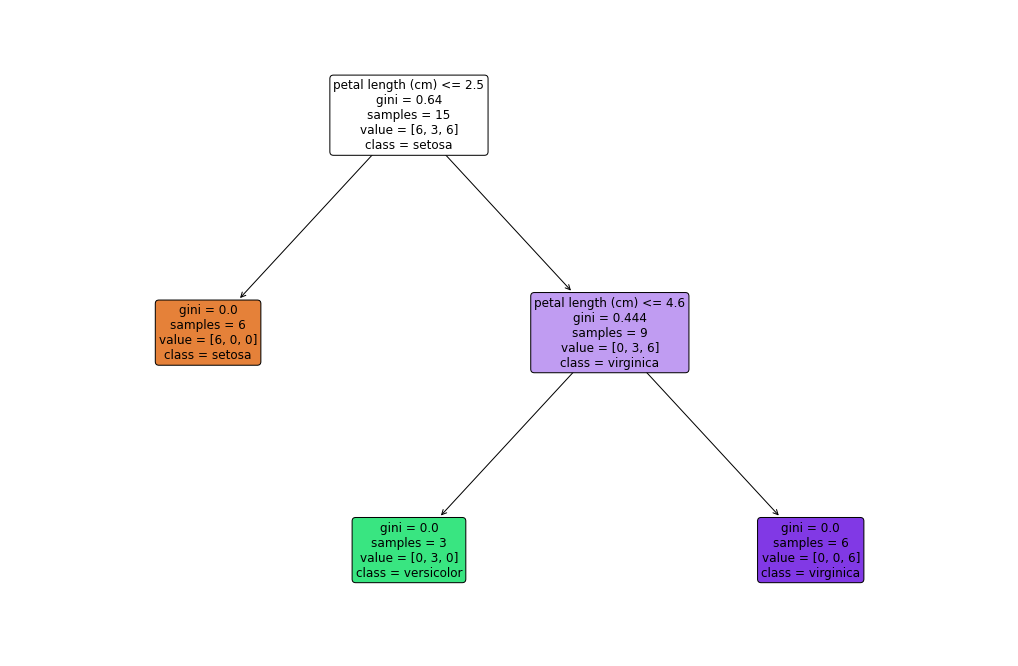

In [51]:
# Gini Criterion - TEST Set

from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='gini')
tree_cl.fit(X_test, y_test)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)



## Observations for the Gini Criterion on the TEST Set:  Petal Length and Petal Length

# 1.2. Criterion = 'entropy' 

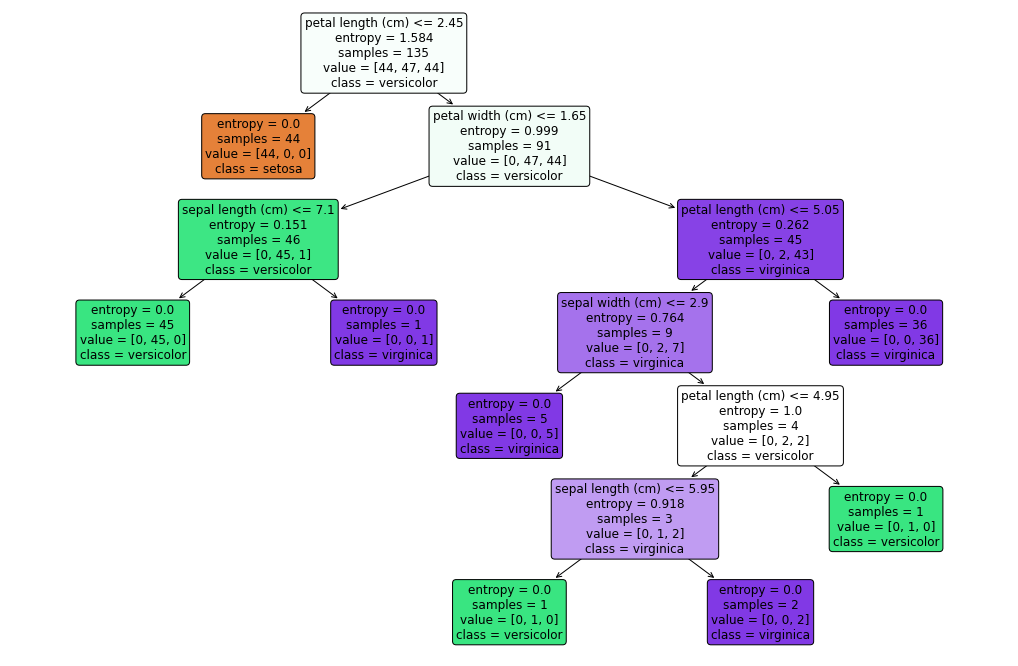

In [77]:
# Entropy Criterion - Train SET:

from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='entropy')
tree_cl.fit(X_train, y_train)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)

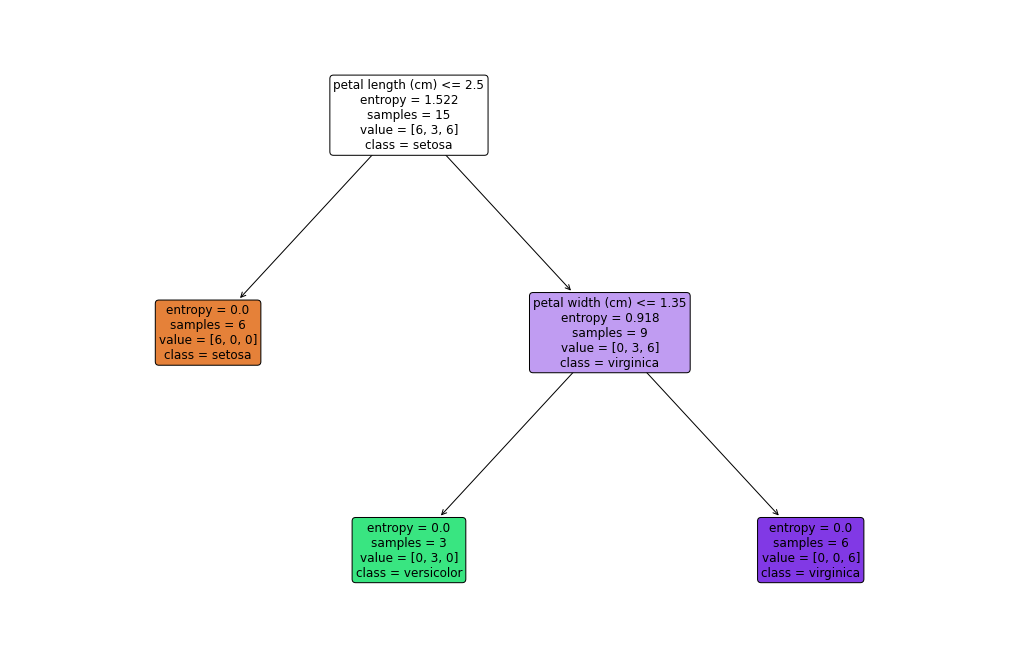

In [52]:
# Entropy Criterion - TEST SET:

from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='entropy')
tree_cl.fit(X_test, y_test)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)


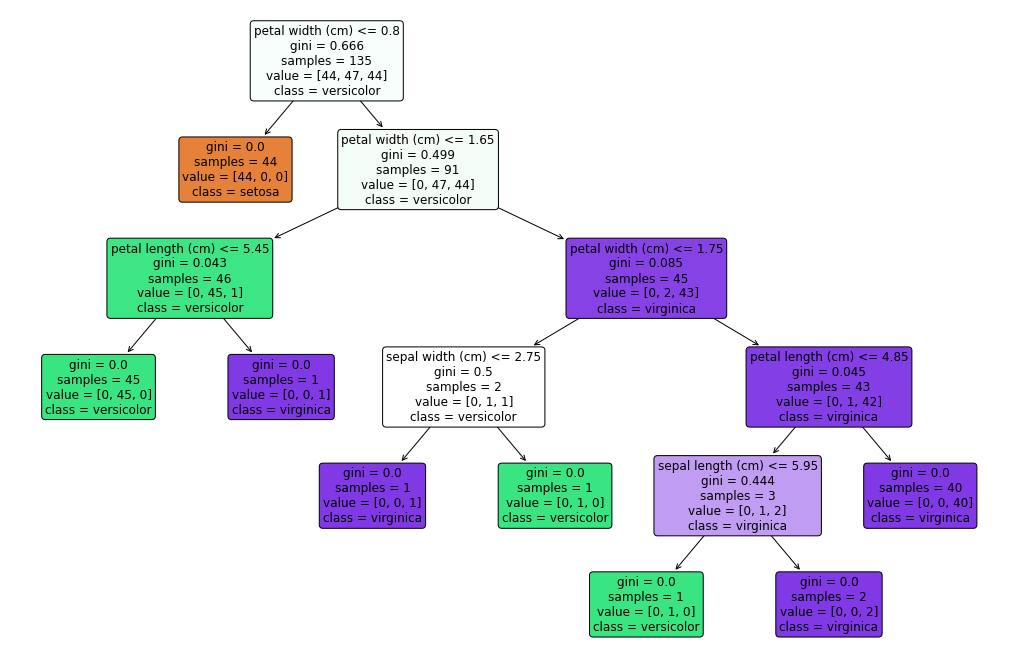

In [96]:
# Gini Criterion - Train SET:

from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='gini')
tree_cl.fit(X_train, y_train)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)

## Observations for the Entropy Criterion on the TEST Set:  Petal Length and <font color = 'red'> Petal Width <font/>

Some studies have shown that entropy tends to favour attributes with many distinct values, while Gini index favors attributes with few distinct values. Also, Gini index is slightly faster to compute than entropy.

For the iris dataset, both impurity measures would likely lead to similar results, as the dataset is small and has relatively simple decision boundaries. However, if we want to choose the impurity measure that is most appropriate for the iris dataset, we can compare their performance using cross-validation and other evaluation metrics.

For example, we could use k-fold cross-validation to estimate the accuracy of decision trees trained using the Gini index and entropy as impurity measures. The impurity measure that leads to a higher accuracy on average across multiple cross-validation folds could be considered more suitable for the iris dataset.

# Cross validation?

In [71]:
from sklearn.model_selection import cross_val_score

import time
start_time = time.time()

scores = cross_val_score(
    tree_cl, X_train, y_train, cv=5, scoring="accuracy"
)

print("--- %s seconds ---" % (time.time() - start_time))
#%time

print("scores:",scores)

print()

--- 0.012691020965576172 seconds ---
scores: [0.93 0.96 0.96 0.93 1.  ]



In [72]:
scores


array([0.93, 0.96, 0.96, 0.93, 1.  ])

In [73]:
np.mean(scores)

0.9555555555555555

In [99]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load the iris dataset
iris = load_iris()

# Create a decision tree classifier with the Gini index as impurity measure
gini_clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Create a decision tree classifier with entropy as impurity measure
entropy_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Use k-fold cross-validation to estimate the accuracy of the classifiers
k = 15
gini_scores = cross_val_score(gini_clf, iris.data, iris.target, cv=k)
entropy_scores = cross_val_score(entropy_clf, iris.data, iris.target, cv=k)

print("gini_scores:", gini_scores)
print("entropy_scores", entropy_scores)
print()
print("gini_scores mean:", np.mean(gini_scores))
print("entropy_scores mean:", np.mean(entropy_scores))

# Print the mean accuracy scores and standard deviations of the classifiers
#print("Gini accuracy: %0.2f (+/- %0.2f)" % (gini_scores.mean(), gini_scores.std() * 2))
#print("Entropy accuracy: %0.2f (+/- %0.2f)" % (entropy_scores.mean(), entropy_scores.std() * 2))


gini_scores: [1.  1.  0.9 1.  1.  1.  0.8 1.  0.9 0.8 0.9 1.  0.9 1.  1. ]
entropy_scores [1.  1.  0.9 1.  1.  1.  0.8 1.  0.9 0.8 0.9 1.  0.9 1.  1. ]

gini_scores mean: 0.9466666666666668
entropy_scores mean: 0.9466666666666668


## **Exercise 2**: Train a decision tree classifier on the iris dataset using entropy criterion and plot the resulting decision tree.

Is this model performing better than the one trained using the gini impurity number?

### NOTE: Review the constructor parameters of the DecisionTreeClassifier to change the criterion from 'gini' (default) to 'entropy'

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



# 2.1 Entropy DTC on WHOLE IRIS set

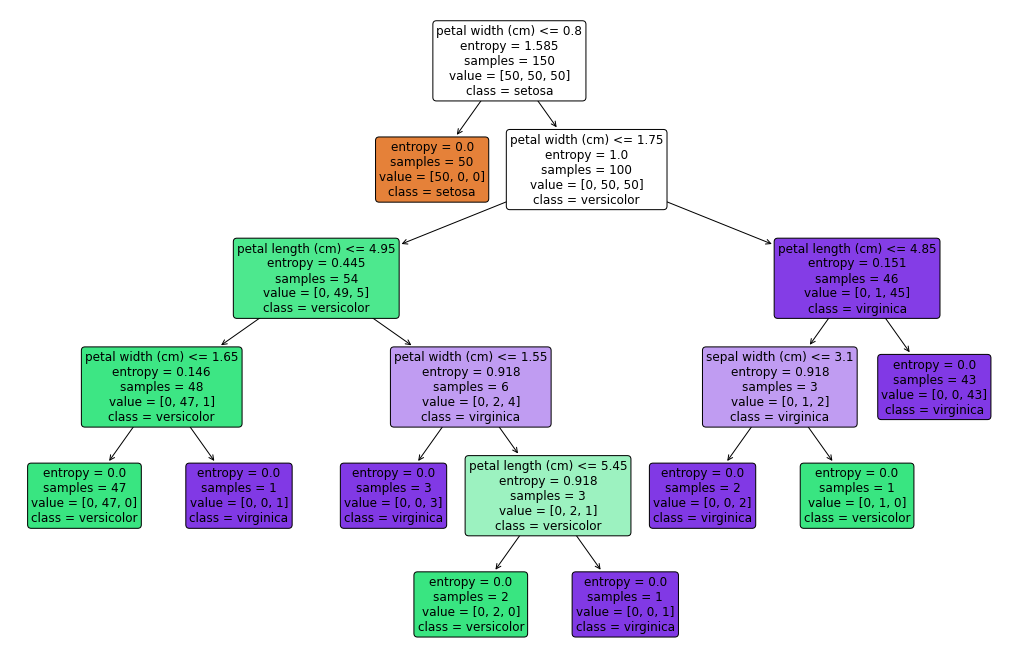

In [59]:
# Entropy on the WHOLE IRIS set

from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='entropy')
tree_cl.fit(iris.data, iris.target)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)

# 2.2 Entropy DTC on Train set

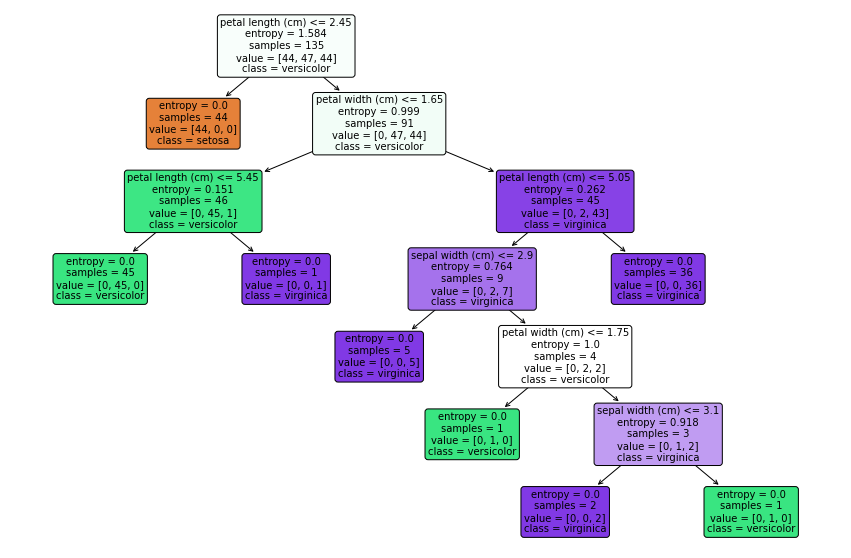

In [63]:
# Entropy on the train set

from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='entropy')
tree_cl.fit(X_train, y_train)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15, 10))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=10
)

# 2.3 Entropy DTC on Test Set

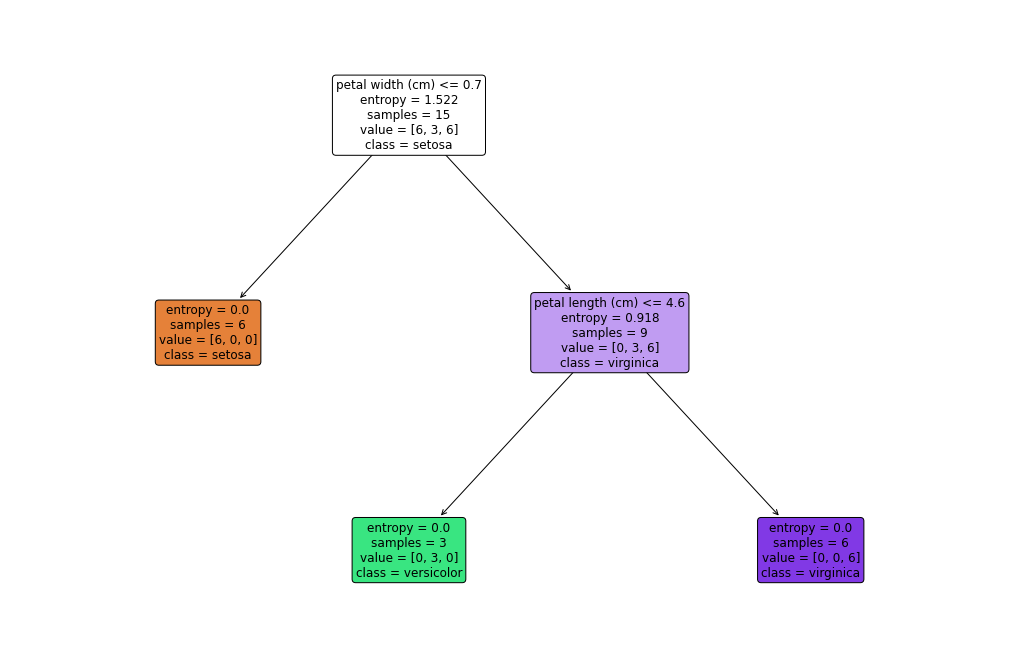

In [57]:
# Entropy on the test set

from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='entropy')
tree_cl.fit(X_test, y_test)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)

### Decision surfaces for Decision Trees

Using the code below,we can plot the decision surface of a decision tree trained on pairs of features of the iris dataset. 

For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

NOTE: we are using the whole dataset as training set in this particular example, just for illustration purposes.

(0.0, 7.88, -0.9, 3.4800000000000044)

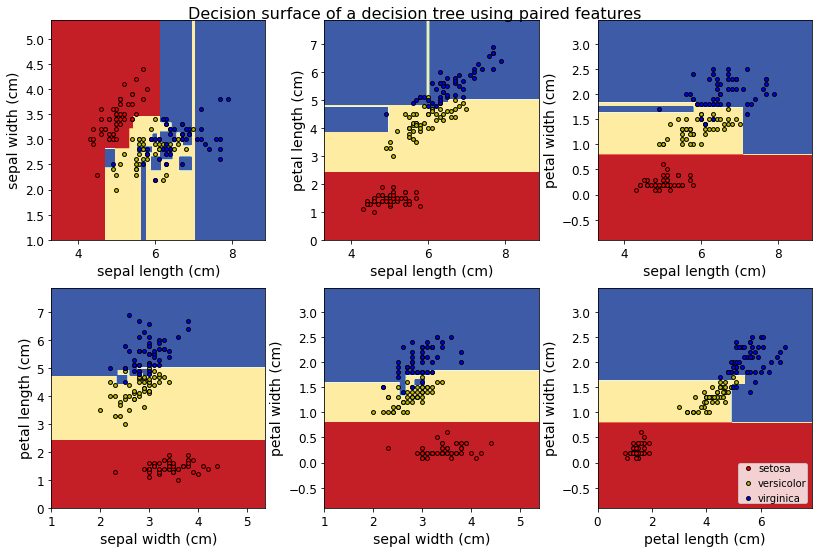

In [97]:
## Source code here: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features", size=16)
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

### Final considerations on Decision Trees

Decision Trees are *non-parametric models*. This means that the number of parameters is not pre-determined before training. This increases the risk that the model will overfit the training data (especially if you have a large number of features).

To regularize the Decision Tree you can control the following parameters:
* `max_depth`
* `min_samples_split` (minimum number of samples that a node must have before being split)
* `min_samples_leaf` (minimum number of samples a leaf node must have)
* `min_weight_fraction_leaf` (same as `min_samples_leaf` but expressed a fraction of the total number of weighted instances)
* `max_leaf_nodes` (maximum number of leaf nodes you want to allow)
* `max_features` (maximum number of features that are evaluated for splitting at each node)

Decision Trees are very easy to interpret. They are indeed a so-called explicitly interpretable ML model. However, they are very sensitive to variations in the training data and prone to overfitting. To avoid these drawbacks you can train an ensembe model built on a number of Decision Trees, a so called Random Forest.

In the next section we will see Ensembe Models and Random Forests